In [42]:
import numpy as np

num_origin = 5
num_destin = 5
S = 25 # Size: Length and width of the board
L = 2  # Depth (layers). This is always 2. I added it here for clarity

# Create a 3D array of size 25x25x2 initialized with zeros
board  = np.zeros((S, S, L), dtype=np.uint8)

# choose 10 unique random points on the board on the first layer but only between 1 and S-2 (in our case it's 23)
points = np.random.choice(np.arange(1, S-2), size=(num_origin + num_destin, 2), replace=False)

# split the points into origins and destinations
origins_2d = points[:num_origin]
destins_2d = points[num_origin:]

# expand the 2D points to 3D points by adding the layer index to be 0 (will be useful in the routing check operations)
origins    = np.hstack((origins_2d, np.zeros((num_origin, 1), dtype=np.uint8)))
destins    = np.hstack((destins_2d, np.zeros((num_destin, 1), dtype=np.uint8)))

# # convert the 3D points to tuples for easy indexing in the search function
# origins = [tuple(element) for element in origins]
# destins = [tuple(element) for element in destins]


# assign the locations of origin and destination points as occupied
# for i in range(num_origin):
#     board[origins[i]] = 1
# for i in range(num_destin):
#     board[destins[i]] = 1

# assign the border of the board as occupied on all layers
board[origins[:, 0], origins[:, 1], 0] = 1
board[destins[:, 0], destins[:, 1], 0] = 1
board[0,  :,  :] = 1
board[24, :,  :] = 1
board[:,  0,  :] = 1
board[:,  24, :] = 1

In [51]:
# define a function to check if a point is occupied
def is_occupied(point, wave):
    return board[point] == 1 or wave[point] != 0

# define a recursive function to expand the wave and search for the shortest path to the finish
def wave_search(wave, point, distance, finish):
    if point == finish:
        return np.array(point)
    if is_occupied(point, wave):
        return None
    wave[point] = distance
    for i in range(-1, 1):
        for j in range(-1, 1):
            if i == 0 and j == 0:
                continue
            result = wave_search(wave, ((point[0]+i), (point[1]+j), point[2]), distance + 1, finish)
            if result is not None:
                return [np.array(point), result]
    temp = point[2] ^ 1
    result = wave_search(wave, ((point[0]+i), (point[1]+j), temp), distance + 1, finish)
    if result is not None:
        return [np.array(point), result]
    return None 

In [52]:
# Start the routing process

# I'm using the defenition of distance where straight lines are distance 1, and diagonals are distance 2.
paths = []  # Define "paths" as an empty array before the loop
for i in range(5):
    start = tuple(origins[i])
    for j in range(5):
        finish = tuple(destins[j])
        wave = np.zeros((25, 25, 2), dtype=np.int8)
        paths.append(wave_search(wave, start, 0, finish))  # Append the result of wave_search to "paths"

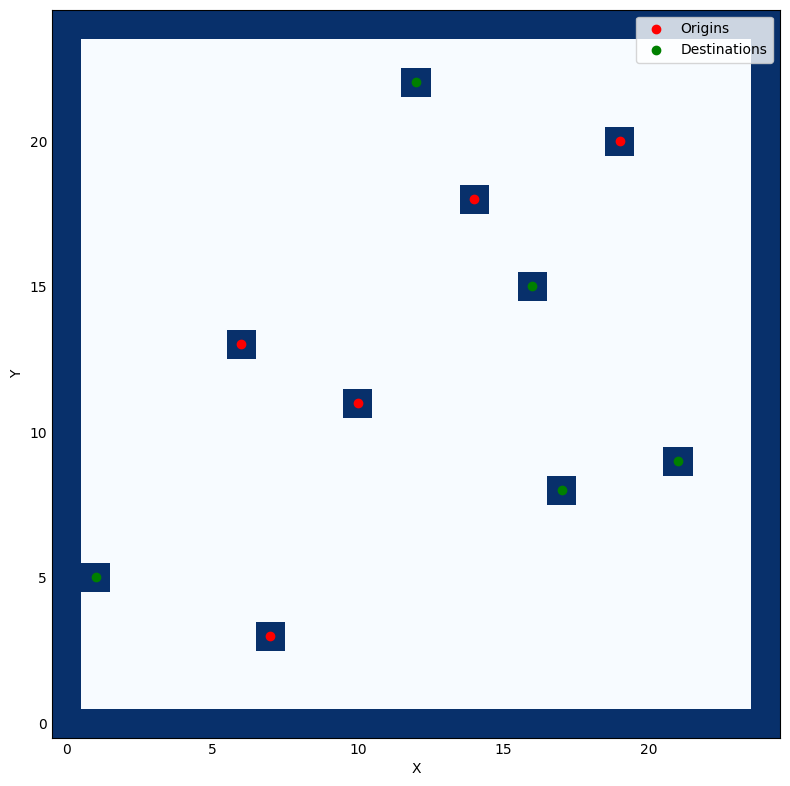

In [53]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

plt.figure(figsize=(8,8))
plt.imshow(board[:, :, 0])
plt.xlim(-0.5, 24.5)
plt.ylim(-0.5, 24.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(origins[:, 1], origins[:, 0], c='r', label='Origins')
plt.scatter(destins[:, 1], destins[:, 0], c='g', label='Destinations')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Origins:\n", origins, "\n")
print("Destinations:\n", destins, "\n")
print("Points:\n", points)